<p style="text-align:center; font-size:20px; font-weight:700; font-family: monospace; background-color:rgb(50,50,50); color:rgb(0,255,0); padding:1vh 1vw; border:hidden; border-radius:3px">Projeto 3 - Ciência dos Dados</p>

Alunos:
<ul style="font-family:monospace">
    <li>Cicero Tiago Carneiro Valentim</li>
    <li>Luiz Felipe Lazzaron</li>
    <li>Marcos Vinícius da Silva</li>
    <li>Thalia Loiola Silva</li>
</ul>

In [107]:
from imports import *
%matplotlib inline

In [136]:
airbnb = pd.read_csv("AB_NYC_2019.csv")

In [137]:
airbnb.head(2)

id                                name  host_id host_name  \
0  2539  Clean & quiet apt home by the park     2787      John   
1  2595               Skylit Midtown Castle     2845  Jennifer   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355

In [138]:
# limpar colunas desnecessárias:
airbnb = airbnb.drop(columns=["id","name","host_name","minimum_nights","last_review", 'reviews_per_month', 'calculated_host_listings_count', 'host_id'])

In [139]:
# analisar a coluna "room_type", pois ela parece ser relevante para a análise
airbnb["room_type"].value_counts() # Essa coluna mostrou bastante potencial como variável qualitativa

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [140]:
airbnb.head(2)

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   

   price  number_of_reviews  availability_365  
0    149                  9               365  
1    225                 45               355

In [156]:
X = airbnb.iloc[:,5].values
X

array([149, 225, 150, ..., 115,  55,  90], dtype=int64)

In [157]:
y = airbnb.iloc[:, 4].values
y

array(['Private room', 'Entire home/apt', 'Private room', ...,
       'Entire home/apt', 'Shared room', 'Private room'], dtype=object)

In [158]:
print(airbnb.describe())

           latitude     longitude         price  number_of_reviews  \
count  48895.000000  48895.000000  48895.000000       48895.000000   
mean      40.728949    -73.952170    152.720687          23.274466   
std        0.054530      0.046157    240.154170          44.550582   
min       40.499790    -74.244420      0.000000           0.000000   
25%       40.690100    -73.983070     69.000000           1.000000   
50%       40.723070    -73.955680    106.000000           5.000000   
75%       40.763115    -73.936275    175.000000          24.000000   
max       40.913060    -73.712990  10000.000000         629.000000   

       availability_365  
count      48895.000000  
mean         112.781327  
std          131.622289  
min            0.000000  
25%            0.000000  
50%           45.000000  
75%          227.000000  
max          365.000000  


### Separação em teste e treinamento

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [160]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[120. 175.  95. ... 175. 130. 600.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [113]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(airbnb, airbnb["room_type"]):
    strat_train_set = airbnb.loc[train_index]
    strat_test_set = airbnb.loc[test_index]

In [114]:
strat_train_set.head()

neighbourhood_group       neighbourhood  latitude  longitude  \
12776            Brooklyn        Williamsburg  40.71602  -73.96248   
38717           Manhattan             Tribeca  40.71519  -74.00654   
35008           Manhattan        West Village  40.73202  -74.00348   
266              Brooklyn        Williamsburg  40.70690  -73.95467   
38787            Brooklyn  Bedford-Stuyvesant  40.69054  -73.92801   

             room_type  price  number_of_reviews  availability_365  
12776  Entire home/apt    130                 67               252  
38717  Entire home/apt    312                  0                38  
35008     Private room    150                  2                56  
266       Private room     60                 14               362  
38787  Entire home/apt     75                  4                10

In [115]:
airbnb = strat_train_set.drop("price", axis=1)
airbnb_labels = strat_train_set["price"].copy()

In [116]:
airbnb.head(2)

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
12776            Brooklyn  Williamsburg  40.71602  -73.96248  Entire home/apt   
38717           Manhattan       Tribeca  40.71519  -74.00654  Entire home/apt   

       number_of_reviews  availability_365  
12776                 67               252  
38717                  0                38

In [117]:
airbnb.shape, airbnb_labels.shape

((39116, 7), (39116,))

In [118]:
num_attribs = list(airbnb.drop(columns=["neighbourhood_group","neighbourhood","room_type"]).columns)
cat_attribs = ["neighbourhood_group","neighbourhood","room_type"]

num_pipeline = Pipeline([
    ( 'selector', DataFrameSelector(num_attribs) ),
    ('imputer', SimpleImputer(strategy="median")),
    ( 'std_scaler', StandardScaler() )
])
cat_pipeline = Pipeline([
    ( 'selector', DataFrameSelector(cat_attribs) ),
    ( 'label_encoder', LabelEncoder())
])
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
])

In [119]:
airbnb_prepared = full_pipeline.fit_transform(airbnb)

In [120]:
some_data = airbnb.iloc[:8]

In [121]:
some_labels = airbnb_labels.iloc[:8]

In [122]:
some_data_prepared = full_pipeline.transform(some_data)

<hr><p style="text-align:center; font-size:20px; font-weight:700; font-family: monospace">Regressão Logística</p><hr>

 A regressão logística é uma ferramenta da estatística usada, em geral, para modelar um resultado binomial (1 ou 0), determinando sucesso ou fracasso de determinado acontecimento. 

In [123]:
time_init = time()

log_reg = LogisticRegression()
log_reg.fit(airbnb_prepared, airbnb_labels)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))


Tempo gasto: 64.91 segundos


In [124]:
print("Predictions:\t", list(log_reg.predict(some_data_prepared)))
print("Labels:\t\t", list(some_labels))

Predictions:	 [150, 200, 100, 60, 150, 100, 150, 125]
Labels:		 [130, 312, 150, 60, 75, 180, 399, 119]


In [125]:
time_init = time()

log_rmse_scores = cross_val_score(log_reg, airbnb_prepared, airbnb_labels,
                             scoring="neg_mean_squared_error", cv=10)

print("\nTempo gasto: {:.2f} segundos".format(time() - time_init))


Tempo gasto: 532.26 segundos


In [126]:
display_scores(log_rmse_scores)

Scores: [-232229.4753603  -114523.14937759  -62779.69650873  -23538.35428282
  -22990.16850474  -15720.72394073  -15380.56144958  -13089.30490066
  -10702.9435527   -11038.08554413]
Mean: -52199.246342198465
Standard deviation: 67611.97017849261


In [127]:
airbnb_predictions = log_reg.predict(airbnb_prepared)

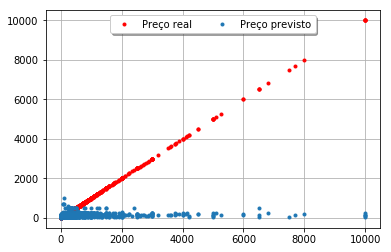

In [128]:
ax = plt.subplot(111)
plt.plot(airbnb_labels, airbnb_labels, 'r.', label='Preço real')
plt.plot(airbnb_labels, airbnb_predictions, '.', label='Preço previsto')
plt.grid(True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.show()

Note que o gráfico acima está baseado em valores que foram apresentados pela coluna "Price" do dataset que está sendo analisado versus o valor que foi previsto usando a ferramenta de Regressão Logística. O eixo y, para os valores em azul, está sendo representado pelos valores previstos.

Esse modelo, no entanto, não é o que melhor cumpre o esperado, uma vez que os valores são consideravelmente diferentes dos reais, como é mostrado no gráfico.